## 1 - Building basic functions with numpy ##

Numpy is the main package for scientific computing in Python. It is maintained by a large community (www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

### 1.1 - sigmoid function, np.exp() ###

Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="Sigmoid.png" style="width:500px;height:228px;">

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

In [ ]:
import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + math.exp(-x))
    ### END CODE HERE ###
    
    return s

In [ ]:
basic_sigmoid(3)

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** basic_sigmoid(3) **</td> 
        <td>0.9525741268224334 </td> 
    </tr>

</table>

Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful. 

In [ ]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

In fact, if $ x = (x_1, x_2, ..., x_n)$ is a row vector then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [ ]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

Furthermore, if x is a vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 

You can also create a new cell in the notebook and write `np.exp?` (for example) to get quick access to the documentation.

**Exercise**: Implement the sigmoid function using numpy. 

**Instructions**: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices...) are called numpy arrays. You don't need to know more for now.
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [ ]:
import numpy as np # this means you can access numpy functions by writing np.function() instead of numpy.function()

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-x))
    ### END CODE HERE ###
    
    return s

In [ ]:
x = np.array([1, 2, 3])
sigmoid(x)

**Expected Output**: 
<table>
    <tr> 
        <td> **sigmoid([1,2,3])**</td> 
        <td> array([ 0.73105858,  0.88079708,  0.95257413]) </td> 
    </tr>
</table> 


### 1.2 - Sigmoid gradient

As you've seen in lecture, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [ ]:
def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    s = 1 / (1 + np.exp(-x))
    ds = s * (1 - s)
    ### END CODE HERE ###
    
    return ds

In [ ]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

**Expected Output**: 


<table>
    <tr> 
        <td> **sigmoid_derivative([1,2,3])**</td> 
        <td> [ 0.19661193  0.10499359  0.04517666] </td> 
    </tr>
</table> 



### 1.3 - Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="image2vector.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [ ]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    v = np.reshape(image, (image.shape[0] * image.shape[1] * image.shape[2],1))
    ### END CODE HERE ###
    
    return v

In [ ]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

**Expected Output**: 


<table style="width:100%">
     <tr> 
       <td> **image2vector(image)** </td> 
       <td> [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]</td> 
     </tr>
    
   
</table>

### 1.4 - Normalizing rows

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$ Note that you can divide matrices of different sizes and it works fine: this is called broadcasting and you're going to learn about it in part 5.


**Exercise**: Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [ ]:
def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, axis=1, keepdims = True)
    
    # Divide x by its norm.
    x = x / x_norm
    ### END CODE HERE ###

    return x

In [ ]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))

**Expected Output**: 

<table style="width:60%">
    <tr> 
        <td> **normalizeRows(x)** </td>
        <td> [[ 0.          0.6         0.8]
 [ 0.13736056  0.82416338  0.54944226]]</td> 
    </tr>
</table>

### 1.5 Implement Logistic Regression

1. Define a **log_reg function** with arguments X, y and alpha (features, target and the learning rate of the gradient descent):

- this function should implement the **gradient descent** based on X and y and the logistic cost function that you will specify. 

*Remember that through forward and backward propagation of the computational graph, the gradient descent should update the weights of the model. You can implement this either by loops or by vectorization (during the next class we will cover the vectorized implementation of this).

2. Define a **RandomGridSearch** function that takes as input arguments the estimator (an example could be log_reg()), the number of cross validation folds, and the possible values of the hyperparameters, in this case it is the learning_rate of the gradient descent in a list format (example alpha_grid = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]). 

- the final form could be as follows: 
    RandomGridSearch(log_reg(), X, y, alpha, cv = 3, alpha_grid = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5]).
    
- this function should randomly select several hyperparameter values from alpha_grid and perform cross validations for each of those values. For each alpha_grid value this function should get a list of cross validation scores. 
- use **ROC AUC score** as a score metric, you can find roc_auc_score function in scikit learn's metrics module useful for this task. 

*Note that the number of scores will depend on the value of "cv" you specify in the function. At the end, this function should return the best hyperparameter value based on the best average cross validation score.
Using this hyperparameter value you can train your final model on the whole training set by using log_reg function with X, y, and alpha = best hyperparameter from RandomGridSearch.

3. Using all of your defined functions train a logistic regression model on **Santander Customer Satisfaction** problem that you can find on Kaggle. 
- You can take several features of your choice from the dataset for training the model (for example up to 5-7 features). The target is binary. 
- Be careful with the target, **if it is imbalanced** you can use oversampling, undersampling, class weighting in cost function or any other method of dealing with the imbalanced target that you may find useful (you can do your research here). 
- After training the model, report the main performance metrics of your model: **ROC AUC score, precision and recall, F1 score**, as well as the **ROC curve and confusion matrix**.
- Write a short description about the trained model and its performance in a way you see it. Describe the features you have used, which of them are the most important in terms of predicting the target and interpret in your words the performance metrics of the model. Use 5-7 sentences in maximum.

*Note: You are free to use your preferred coding design with your preferred data structures for this assignment. The most important thing is to get the correct results. We will check it in the future by using the scikit learns logistic function.

In [1]:
import pandas as pd

import kaggle
import os
import zipfile

from sklearn.preprocessing import StandardScaler


In [2]:
def extractind_data(file_name,file_path):
   
    !kaggle competitions download -c santander-customer-satisfaction -f $file_name -p $file_path --force


In [3]:
train_file_name = 'train.csv'
test_file_name = 'test.csv'
raw_data_path = os.path.join(os.path.pardir, 'data', 'Santander_Customer_Satisfaction')

extractind_data(train_file_name, raw_data_path)
extractind_data(test_file_name, raw_data_path)


  0%|          | 0.00/4.05M [00:00<?, ?B/s]
 25%|##4       | 1.00M/4.05M [00:04<00:14, 228kB/s]
 49%|####9     | 2.00M/4.05M [00:06<00:07, 276kB/s]
 74%|#######4  | 3.00M/4.05M [00:09<00:03, 308kB/s]
 99%|#########8| 4.00M/4.05M [00:11<00:00, 332kB/s]
100%|##########| 4.05M/4.05M [00:11<00:00, 364kB/s]



  0%|          | 0.00/4.02M [00:00<?, ?B/s]
 25%|##4       | 1.00M/4.02M [00:02<00:08, 365kB/s]
 50%|####9     | 2.00M/4.02M [00:05<00:05, 384kB/s]
 75%|#######4  | 3.00M/4.02M [00:07<00:02, 422kB/s]
 99%|#########9| 4.00M/4.02M [00:08<00:00, 464kB/s]
100%|##########| 4.02M/4.02M [00:08<00:00, 472kB/s]


In [4]:
# Will unzip the files so that you can see them..
Dataset = "train.csv"

with zipfile.ZipFile(raw_data_path +'\\' + Dataset +".zip","r") as z:
    z.extractall(raw_data_path)

In [89]:
data = pd.read_csv(raw_data_path+'\\train.csv')
columns = ['var3','var15','saldo_medio_var44_hace3','saldo_medio_var44_ult1','saldo_medio_var44_ult3','var38']

p0 = data[data['TARGET']==0].head(3000)
p1 = data[data['TARGET']==1]
df = pd.concat([p0,p1])

X = df[columns].values
y = df['TARGET'].values

In [90]:
scale = StandardScaler()
x_scaled = scale.fit_transform(X)

In [70]:
import numpy as np
class my_logit_regressor():
    
    def __init__(self, n_iter = 500, eta = 0.001):
        
        self.n_iter =n_iter
#         self.eta = eta
        
    def fit(self, X, y, eta):
        self.theta = np.zeros(1 + (X.shape[1]))
        self.loss = []
        
        for i in range(self.n_iter):
            
            zeta = self.net_input(X)
            pred = self.sigmoid(zeta)
            error = y - pred 
            self.theta[1:] += eta * X.T.dot(error) 
            self.theta[0] = eta * error.sum()
#             loss = self.cost(pred,y)
        
#             self.loss.append(loss)
#         return self.loss   
        
    def net_input(self, X):
        return np.dot(X, self.theta[1:]) + self.theta[0]
        
    def sigmoid(self, zeta):        
        return 1/(1 + np.exp(-np.clip(zeta, -100,100)))
    
    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, 0)
   
    def cost(self, z, y):
        return -(np.dot(y,np.log(z)) +  np.dot(1 - y, np.log(1-z)))

# Implementing RandomGridSearch

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

In [71]:
class myRandomGridSearch:
    def __init__(self, estimator, alpha, cv, n_iter = 100):
        self.estimator = estimator
        self.cv = cv
        self.alpha = alpha
        self.n_iter = n_iter
        
    def fit(self, X, y):
        
        for alpha in self.alpha:
           
            split = StratifiedShuffleSplit(n_splits = self.cv, test_size=0.3,  random_state= 42)
            split.get_n_splits(X, y)
            
            for train_index, test_index in split.split(X,y):
                
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                self.estimator.fit(X_train, y_train, alpha)
                
                
                pred =  self.estimator.predict(X_test)
                
            self.modelReport(y_test, pred, alpha)

                
    def modelReport(self, y, pred, alpha):
        
        print('Model Learning Rate : ', alpha , 
              '\nF1 Score:          ', f1_score(y, pred, labels=np.unique(pred)),
              '\nROC Score:         ', roc_auc_score(y, pred),
              '\nRecall Score:      ', recall_score(y, pred),
              '\nPrecision Score:   ', precision_score(y, pred, zero_division=1),
              '\nConfusion Matrix:\n', confusion_matrix(y, pred),
              '\n\n\n***************************************\n\n\n')
#         print('Confusion Matrix:', roc_curve(y, pred))

           

In [91]:
logit_model = my_logit_regressor()
rg = myRandomGridSearch(estimator = logit_model,  cv=5, alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5])
rg.fit(x_scaled ,y)

Model Learning Rate :  1e-05 
F1 Score:           0.603003003003003 
ROC Score:          0.6335179032853452 
Recall Score:       0.5559246954595792 
Precision Score:    0.6587926509186351 
Confusion Matrix:
 [[640 260]
 [401 502]] 


***************************************



Model Learning Rate :  0.0001 
F1 Score:           0.6071856287425149 
ROC Score:          0.6362864525655223 
Recall Score:       0.5614617940199336 
Precision Score:    0.6610169491525424 
Confusion Matrix:
 [[640 260]
 [396 507]] 


***************************************



Model Learning Rate :  0.001 
F1 Score:           0.608955223880597 
ROC Score:          0.6368364710225176 
Recall Score:       0.5647840531561462 
Precision Score:    0.6606217616580311 
Confusion Matrix:
 [[638 262]
 [393 510]] 


***************************************



Model Learning Rate :  0.01 
F1 Score:           0.6724267468069121 
ROC Score:          0.5155703211517165 
Recall Score:       0.991140642303433 
Precision Score:   

Six featurs are used in this model taken from Santander_Customer_Satisfaction data. 
implementing grid search, we can see that in balanced data, we can get F1 score 0.60 when alpha is equal 0.001, but when alpha is becoming bigger the model does not yield accurate scores, it overfits. 


# Comparing with the Sklearn's results

In [119]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [112]:
logit = LogisticRegression(class_weight='balanced')
logit.fit(X_train ,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
pred = logit.predict(X_test)

In [135]:
print(    '\nF1 Score:          ', f1_score(y_test, pred),
          '\nROC Score:         ', roc_auc_score(y_test, pred),
          '\nRecall Score:      ', recall_score(y_test, pred),
          '\nPrecision Score:   ', precision_score(y_test, pred),
          '\nConfusion Matrix:\n', confusion_matrix(y_test, pred))


F1 Score:           0.6216657593903103 
ROC Score:          0.6476385252498498 
Recall Score:       0.5991605456453305 
Precision Score:    0.6459276018099548 
Confusion Matrix:
 [[717 313]
 [382 571]]


In [137]:
# ROC for Logistic regression model
y_pred_grd = logit.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, pred)

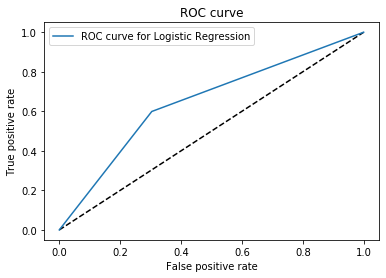

In [138]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')


plt.plot(fpr_grd, tpr_grd, label='ROC curve for Logistic Regression')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
